In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

Behavioural Cloning-2.ipynb          model-000.h5  model.h5
Behavioural Cloning.ipynb            model-001.h5  model.py
Preprocess and augment- data2.ipynb  model-002.h5  model2.py
Preprocess and augment.ipynb         model-003.h5  requirements.txt
README.md                            model-004.h5  sharp_turn/
__pycache__/                         model-005.h5  sources.list
data/                                model-006.h5  utilities.py
data2/                               model-007.h5  utils.py
drive.py                             model-008.h5  utils.pyc
drive2.py                            model-009.h5  video.py
examples/                            model-016.h5  writeup_template.md


In [3]:
data = pd.read_csv('data2/driving_log.csv')
data.columns = ['center','left','right','steering','throttle','break','speed']

data_inv = pd.read_csv('data2/driving_log_inv.csv')
data_inv.columns = ['center','left','right','steering','throttle','break','speed']

#udacity data

data_u = pd.read_csv("data2/driving_log_udacity.csv") 
data_u.columns = ['center','left','right','steering','throttle','break','speed']

# #recovery laps:
data_rec = pd.read_csv('data2/driving_log_recovery.csv')
data_rec.columns = ['center','left','right','steering','throttle','break','speed']

data_rec2 = pd.read_csv('data2/driving_log_recovery2.csv')
data_rec2.columns = ['center','left','right','steering','throttle','break','speed']


data_rec3 = pd.read_csv('data2/driving_log_recovery3.csv')
data_rec3.columns = ['center','left','right','steering','throttle','break','speed']

data_rec4 = pd.read_csv('data2/driving_log_recovery4.csv')
data_rec4.columns = ['center','left','right','steering','throttle','break','speed']

data_rec5 = pd.read_csv('data2/driving_log_recovery5.csv')
data_rec5.columns = ['center','left','right','steering','throttle','break','speed']

data_rec6 = pd.read_csv('data2/driving_log_recovery6.csv')
data_rec6.columns = ['center','left','right','steering','throttle','break','speed']

#sharp turn recovery

data_sharp = pd.read_csv('data2/sharp_turn.csv')
data_sharp.columns = ['center','left','right','steering','throttle','break','speed']

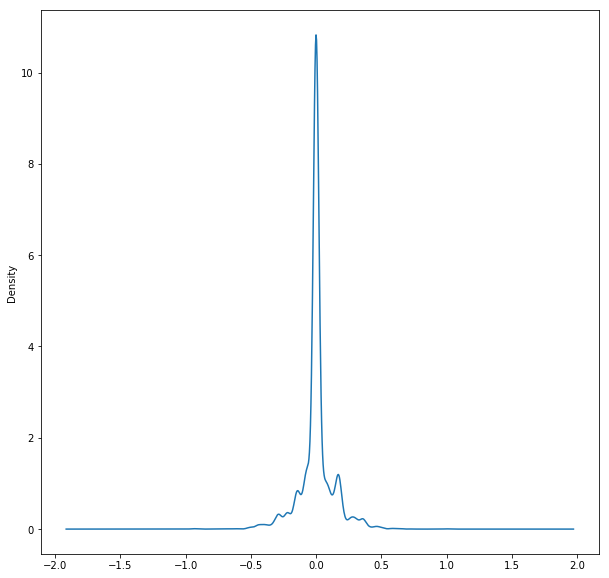

In [4]:
data_u.steering.plot(kind='kde', figsize=(10, 10));

In [5]:
old_path = 'sharp_turn/'
cols = data_sharp.columns.tolist()
for col in cols:
    try:
        data_sharp[col] = data_sharp[col].apply(lambda x: x.replace(old_path, 'IMG/'))
    except:
        pass

In [6]:
data_sharp.left.str.split().str.get(0)

0      IMG/left_2017_02_10_10_45_38_027.jpg
1      IMG/left_2017_02_10_10_45_38_138.jpg
2      IMG/left_2017_02_10_10_45_38_240.jpg
3      IMG/left_2017_02_10_10_45_38_340.jpg
4      IMG/left_2017_02_10_10_45_38_457.jpg
5      IMG/left_2017_02_10_10_45_38_557.jpg
6      IMG/left_2017_02_10_10_45_38_658.jpg
7      IMG/left_2017_02_10_10_45_38_777.jpg
8      IMG/left_2017_02_10_10_45_38_890.jpg
9      IMG/left_2017_02_10_10_45_39_009.jpg
10     IMG/left_2017_02_10_10_45_39_110.jpg
11     IMG/left_2017_02_10_10_45_39_226.jpg
12     IMG/left_2017_02_10_10_45_39_342.jpg
13     IMG/left_2017_02_10_10_45_39_461.jpg
14     IMG/left_2017_02_10_10_45_39_575.jpg
15     IMG/left_2017_02_10_10_45_39_694.jpg
16     IMG/left_2017_02_10_10_45_44_860.jpg
17     IMG/left_2017_02_10_10_45_44_961.jpg
18     IMG/left_2017_02_10_10_45_45_077.jpg
19     IMG/left_2017_02_10_10_45_45_190.jpg
20     IMG/left_2017_02_10_10_45_45_308.jpg
21     IMG/left_2017_02_10_10_45_45_409.jpg
22     IMG/left_2017_02_10_10_45

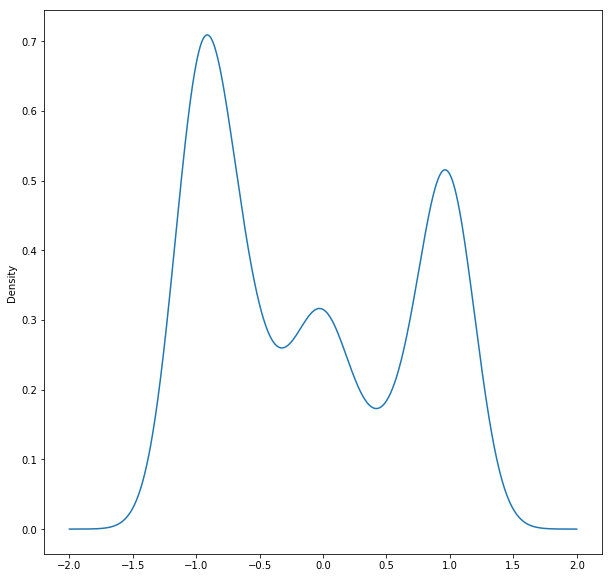

In [7]:
data_sharp.steering.plot(kind='kde', figsize=(10, 10))

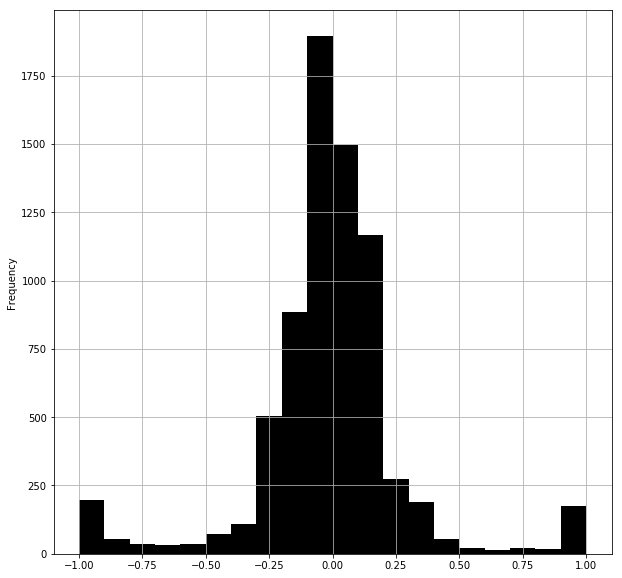

In [23]:
valid_data = pd.concat([data_u, data_sharp, data, data_inv])

# aux1 = data.query('steering == 0')[:500]
# aux2 = data_inv.query('steering == 0')[:500]

valid_data = valid_data.query('steering != 0')



# valid_data = pd.concat([valid_data, data_sharp])

valid_data['steering'].plot(kind='hist',  bins=20, figsize=(10, 10), grid=True, color='k')


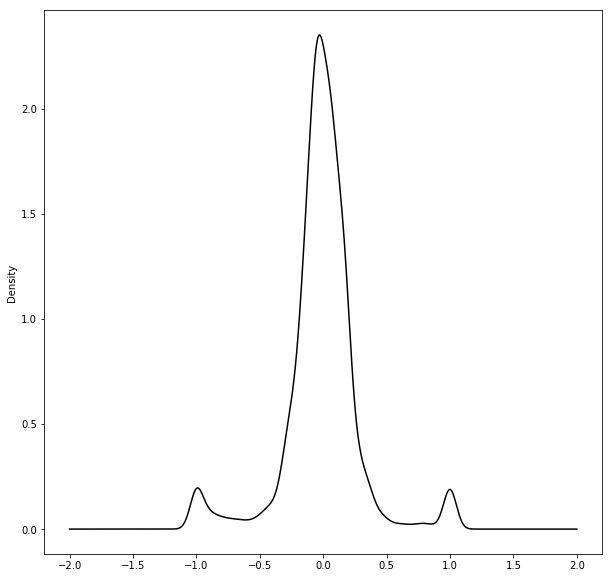

In [24]:
valid_data.steering.plot(kind='kde', figsize=(10, 10), color='k');

In [10]:
valid_data.to_csv('./data2/driving_log_final.csv', header=False, index=False)

In [11]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7259 entries, 51 to 2137
Data columns (total 7 columns):
center      7259 non-null object
left        7259 non-null object
right       7259 non-null object
steering    7259 non-null float64
throttle    7259 non-null float64
break       7259 non-null float64
speed       7259 non-null float64
dtypes: float64(4), object(3)
memory usage: 453.7+ KB
